<a href="https://colab.research.google.com/github/MananAlfred/IMAGE-CLASSIFICATION-CNN-CIFAR10/blob/main/ImgClassificationUsingCNNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE CLASSIFICATION USING CNN**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Downloading Cifar10 Dataset
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

#Output classes de rha ye
print(y_train)
print()
print(y_test)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [4]:
y_train_new = np.squeeze(y_train, axis=1)
y_test_new = np.squeeze(y_test, axis=1)
print(y_train_new)
print(y_train_new.shape)
print(y_test_new)
print(y_test_new.shape)

[6 9 9 ... 9 1 1]
(50000,)
[3 8 8 ... 5 1 7]
(10000,)


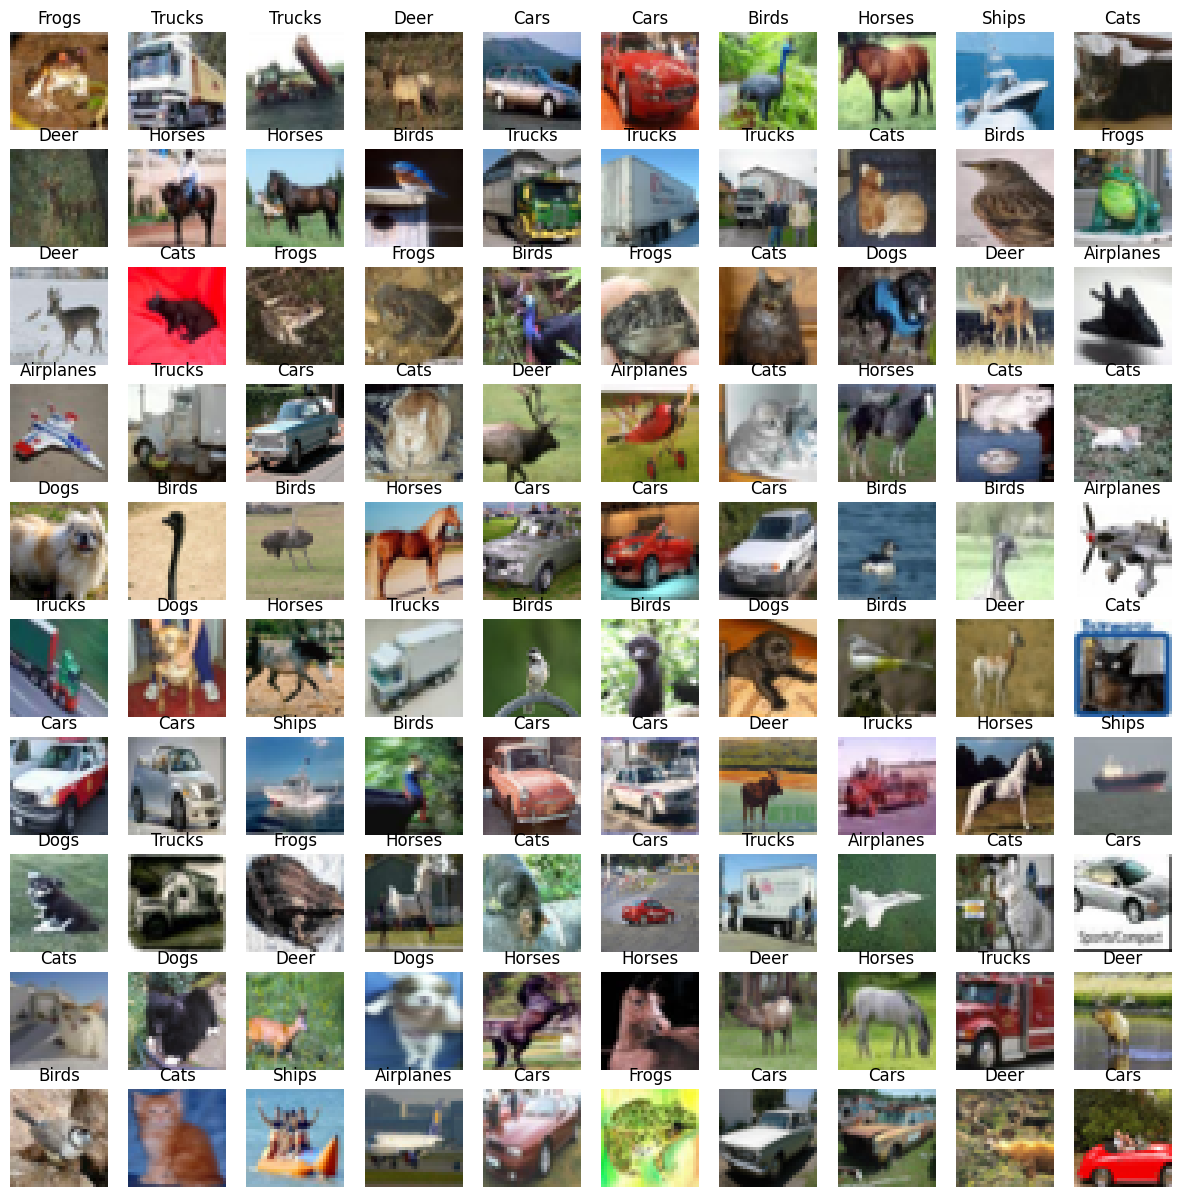

In [ ]:
class_labels = ["Airplanes","Cars","Birds","Cats","Deer","Dogs","Frogs","Horses","Ships","Trucks"]
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(class_labels[y_train_new[i]])

In [5]:
#Pre-Processing
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu',input_shape = (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [ ]:
# Model Summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)         

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
hist = model.fit(x_train,y_train_new,batch_size=64,epochs=50,verbose=1,validation_split=0.4)

Epoch 1/50
469/469 [==============================] - 68s 140ms/step - loss: 1.7327 - accuracy: 0.3877 - val_loss: 2.9375 - val_accuracy: 0.1687
Epoch 2/50
469/469 [==============================] - 60s 129ms/step - loss: 1.3423 - accuracy: 0.5170 - val_loss: 1.2080 - val_accuracy: 0.5665
Epoch 3/50
469/469 [==============================] - 61s 130ms/step - loss: 1.1818 - accuracy: 0.5790 - val_loss: 1.8547 - val_accuracy: 0.4072
Epoch 4/50
469/469 [==============================] - 62s 133ms/step - loss: 1.0857 - accuracy: 0.6186 - val_loss: 1.0778 - val_accuracy: 0.6237
Epoch 5/50
469/469 [==============================] - 62s 132ms/step - loss: 1.0045 - accuracy: 0.6489 - val_loss: 1.0662 - val_accuracy: 0.6295
Epoch 6/50
469/469 [==============================] - 62s 132ms/step - loss: 0.9424 - accuracy: 0.6678 - val_loss: 1.0332 - val_accuracy: 0.6452
Epoch 7/50
469/469 [==============================] - 60s 129ms/step - loss: 0.8949 - accuracy: 0.6857 - val_loss: 1.2295 - val_ac

In [ ]:
model.save("CnnImageClassifier")

In [ ]:
reloaded_model = tf.keras.models.load_model('CnnImageClassifier')

In [ ]:
dict = hist.history
dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

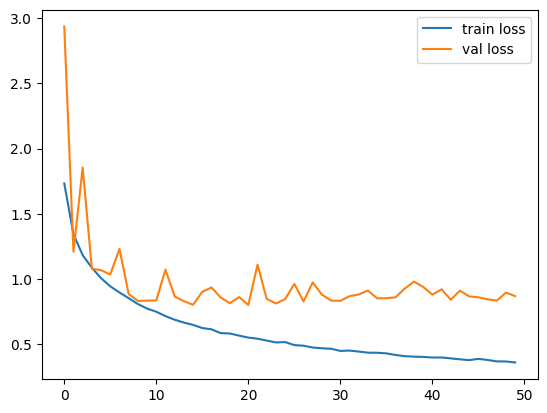

In [ ]:
#Graph of Losses

plt.plot(dict['loss'],label='train loss')
plt.plot(dict['val_loss'],label='val loss')
plt.legend()

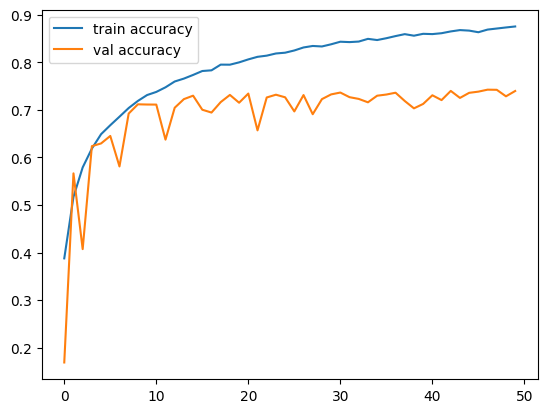

In [ ]:
# Graph of Accuracies
plt.plot(dict['accuracy'],label='train accuracy')
plt.plot(dict['val_accuracy'],label='val accuracy')
plt.legend()

In [1]:
y_pred = reloaded_model.predict(x_test)

NameError: name 'reloaded_model' is not defined

In [ ]:
#Predicted value of 1st Image
print(y_test_new[0])
print(y_pred[0])
print(np.argmax(y_pred[0]))

3
[1.1015940e-05 6.8068175e-06 7.7358432e-05 9.9666482e-01 3.3077397e-04
 7.0082711e-04 1.6416255e-03 1.5626846e-06 5.6255009e-04 2.5945196e-06]
3


In [ ]:
y_label = np.argmax(y_pred,axis=1)
print(y_label)

[3 8 8 ... 5 1 7]


In [ ]:
plt.figure(figsize=(15,15))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  if y_test_new[i]==y_label[i]:
    plt.title(class_labels[y_test_new[i]] + "=" + class_labels[y_label[i]],c='g')
  else:
    plt.title(class_labels[y_test_new[i]] + "=" + class_labels[y_label[i]],c='r')


NameError: name 'plt' is not defined

In [ ]:
test_loss,test_Acc = model.evaluate(x_test,y_test_new)

# Testing Accuracy
print("Test Acc : " + str(test_Acc))

# Testing Loss
print("Test Loss : " + str(test_loss))

313/313 [==============================] - 7s 22ms/step - loss: 0.8730 - accuracy: 0.7365
Test Acc : 0.7365000247955322
Test Loss : 0.8729588985443115


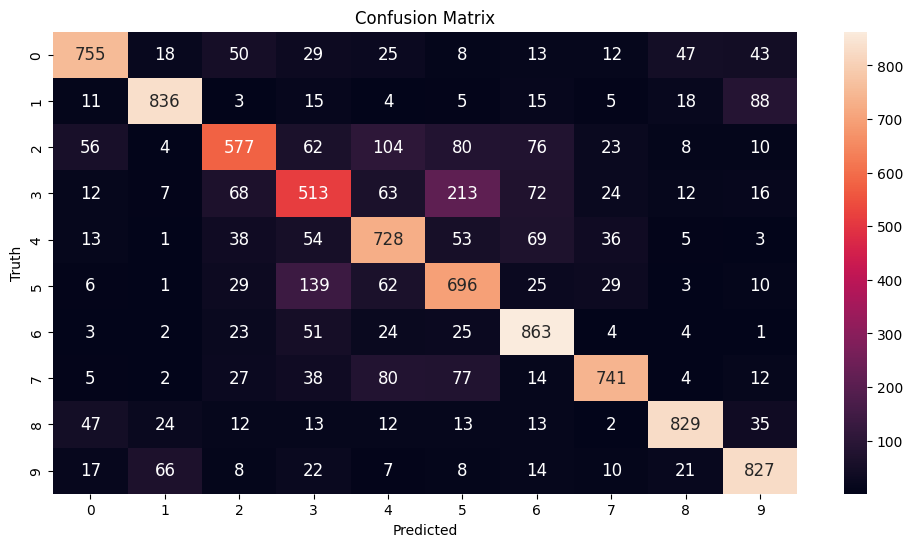

In [ ]:
# Generate a Confusion Matrix for testing
cm = tf.math.confusion_matrix(labels=y_test_new, predictions = y_label)

# Plot the confusion matrix
plt.figure(figsize=[12,6])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",annot_kws={"size":12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()